In [ ]:
!pip install lmfit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.6 MB/s eta 0:00:00


In [ ]:
import batman
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0.                        #time of inferior conjunction
params.per = 3.69                       #orbital period
params.rp = 0.1                       #planet radius (in units of stellar radii)
params.a = 15.                        #semi-major axis (in units of stellar radii)
params.inc = 87.6                     #orbital inclination (in degrees)
params.ecc = 0.15792030666666668      #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "quadratic"        #limb darkening model
params.u = [0.5, 0.1, 0.1, -0.1]

 **Date:30/01/2025**


---
**Things to do:**


*   Continue doing parameters for the batman package.
*   Modelling transits to light curves so we can work out orbital period and the semi major axis

*   Also start looking at using LMFIT
*   




---


**Work Done:**


*   named the lmfit parameters
*    



---
**Papers and Resources:**


*   https://lkreidberg.github.io/batman/docs/html/tutorial.html
*   https://lmfit.github.io/lmfit-py/intro.html


---
**Problems and Solutions:**


*   Unsure of how to use LMfit completely but have the gist so will just ask chatgpt for an explanaition
*   


---
**What to do next:**


*   List item
*   List item










**03/02/2025:**


---
**Things to do:**


*   Finish completing our LMfit function and intialize with out batman package
*   Then test it with a test star to make sure it works


*   If possible start looking at our potential planets, to see if they work.
*


---
**Description of work done:**


*  Some what put together the batman package for the test star and finishing up on the LMfit package.  
*   


---
**Paper and Resources:**


*   https://lkreidberg.github.io/batman/docs/html/tutorial.html
*   https://lmfit.github.io/lmfit-py/intro.html


---
**Problems and Solutions:**

*   Being able to know what goes inside our function called model function.
*   


---
**What to do next:**


*   
*   



















In [ ]:
def keplers_3rd_law(m,t):
    time = t*86400
    mass = m*1.989*10**30
    g = 6.67430*10**(-11)
    a = ((time**2)*g*mass)/(4*(np.pi**2))
    return a**(1/3)

print(keplers_3rd_law(m = 0.3 , t = 3.69)/(1.496*10**11))


def rp_ratio(rpl,rs):
    return (rpl/rs)

0.03128689662000776


In [ ]:
import lmfit as lm
import batman
import numpy as np

from lmfit import fit_report
from lmfit import minimize, Parameters

from astropy import constants as const
from astropy import units as uu

import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

time, flux, flux_err = np.genfromtxt('drive/MyDrive/Colab Notebooks/TEST_PLANET.txt', unpack=True, delimiter=',')
nans = np.isnan(time) | np.isnan(flux) | np.isnan(flux_err)
time, flux, flux_err = time[~nans], flux[~nans], flux_err[~nans]

paramslm = Parameters()
paramslm.add('t', value = 5.34 , vary = True, min = 5.33, max = 5.35)
paramslm.add('m', value = 0.3 , vary = True, min = 0.2 , max = 0.4 )
paramslm.add('w', value = 90, vary = False, min = 87, max = 90)
paramslm.add('rpl',value = 5 , vary = True, min =4 , max =6 )
paramslm.add('rs', value = 0.4, vary = True, min =0.3 , max =0.5 )
paramslm.add('inc', value =88 , vary = False, min =86 , max =90 )
paramslm.add('ecc', value =0.15792030666666668 , vary = False, min = 0.15, max = 0.2)
paramslm.add('t0', value = 2, vary = False)


def keplers_3rd_law(m,t):
    time = t*86400
    mass = m*1.989*10**30
    g = 6.67430*10**(-11)
    a = ((time**2)*g*mass)/(4*(np.pi**2))
    return a**(1/3)/(0.3*6.96*(10**8))

def rp_ratio(rpl,rs):
    return ((rpl*6378)/(rs*6.96*(10**5)))

def model_function(paramslm, time, error, data = None):
  vals = paramslm.valuesdict()
  t = vals['t']
  m = vals['m']
  w = vals['w']
  rpl = vals['rpl']
  rs = vals['rs']
  inc = vals['inc']
  ecc = vals['ecc']
  t0 = vals['t0']
 # frac_rp = vals['frac_rp']

  ax = keplers_3rd_law(m = m , t = t )
  rp = rp_ratio(rpl = rpl ,rs = rs )

#batman package starts here:


  params = batman.TransitParams()       #object to store transit parameters
  params.t0 = t0                        #time of inferior conjunction
  params.per = t                      #orbital period
  params.rp = rp                      #planet radius (in units of stellar radii)
  params.a = ax                        #semi-major axis (in units of stellar radii)
  params.inc = inc                     #orbital inclination (in degrees)
  params.ecc = ecc                     #eccentricity
  params.w = 90.                        #longitude of periastron (in degrees)
  params.limb_dark = "quadratic"        #limb darkening model
  params.u = [0.2,0.2]

  model = batman.TransitModel(params, time)

  m_flux = model.light_curve(params)

  if data is None:
        return m_flux
  else:
        return m_flux-data


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


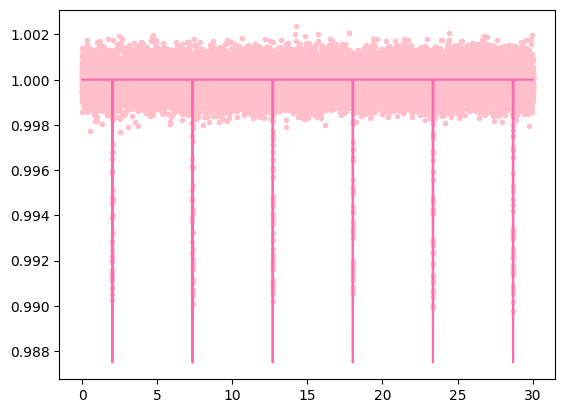

In [ ]:
m_flux = model_function(paramslm, time, flux_err)
plt.plot(time, m_flux, color= 'hotpink')
plt.scatter(time, flux,color = 'pink', marker = '.')
plt.show()
#minimize?
#out = minimize(model_function, params, args=(time, flux_err), kws={'data': flux}, nan_policy='omit')
#print(fit_report(out))


In [ ]:
def keplers_3rd_law(m,t):
    time = t*86400
    mass = m*1.989*10**30
    g = 6.67430*10**(-11)
    a = ((time**2)*g*mass)/(4*(np.pi**2))
    return a**(1/3)/(0.3*6.96*(10**8))

keplers_3rd_law(m = 0.3, t = 5.34)

28.67962798364898